In [27]:
import os
import numpy as np
import random as rng
import cv2
import json
import math
import pywt
from scipy.misc import face
from scipy.signal.signaltools import wiener

In [3]:
info_data = []
with open('/home/data/strips_socrates/dataset_info.json') as json_file: 
    info_data = json.load(json_file) 

In [104]:
STRIP_SIZE = 256
SUB_STRIP_SIZE = 128
DENOISE_SIGMA = 5

In [105]:
def denoise_coefficient_list(coefficient_list, sigma):
    ll = coefficient_list[0]
    denoised_bands = [ll]
    for band, subband_coefficients in enumerate(coefficient_list[1 :]):
        denoised_bands.append([wiener(s.astype(np.float), sigma)
                               for s in subband_coefficients])
    return denoised_bands


In [106]:
def get_residual(grayscale_matrix):
    dyad_length = math.ceil(math.log(STRIP_SIZE, 2))
    ll_levels = 5
    wavelet_levels = dyad_length - ll_levels
    ll_size = 2 ** ll_levels
    coefficient_list = pywt.wavedec2(grayscale_matrix,
                                       'db8',
                                       level = int(wavelet_levels),
                                       mode = 'per')
    coefficient_list = denoise_coefficient_list(coefficient_list,
                                                  DENOISE_SIGMA)
    denoised_tile = pywt.waverec2(coefficient_list,
                                    'db8',
                                    mode = 'per')
    denoised_tile[denoised_tile > 255.0] = 255.0
    denoised_tile[denoised_tile < 0.0] = 0.0
    return (denoised_tile, grayscale_matrix - denoised_tile)


In [107]:
def get_final(denoised, residual):
    numerator = denoised * residual
    denominator = denoised * denoised
    return(numerator/denominator)

In [130]:
img_path = info_data[6][0][1][0]

In [131]:
img = cv2.imread(img_path)

In [132]:
import matplotlib.pyplot as plt

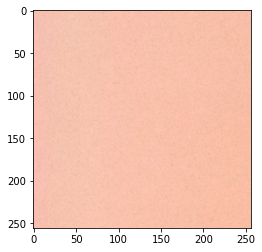

In [133]:
plt.imshow(img)

In [134]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

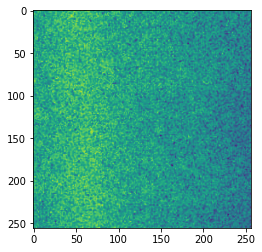

In [135]:
plt.imshow(gray_img)

In [136]:
(denoised, residual) = get_noise(gray_img)

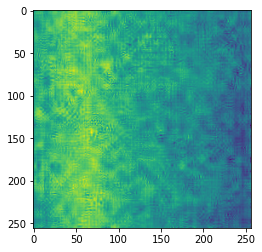

In [137]:
plt.imshow(denoised)

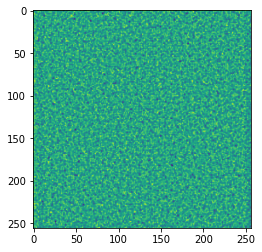

In [138]:
plt.imshow(residual)

In [158]:
final = get_final(denoised, residual)

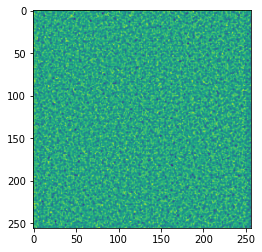

In [159]:
plt.imshow(final)

In [174]:
np.save('testnp', final)

In [163]:
testt = np.load('testnp.npy')

In [168]:
np.amax(testt)

0.03832758080541975

In [162]:
!pwd

/home/projects/studprojskrabec


In [171]:
cv2.normalize(final, final, 0, 256, cv2.NORM_MINMAX)


array([[204.13086647, 140.7242076 , 137.49240188, ..., 177.99431654,
        147.11388349, 196.01733061],
       [169.34149474, 152.39483256, 140.58626242, ..., 137.90103371,
        132.43531128, 162.96075221],
       [147.52482596, 158.46405397, 135.51133285, ..., 143.91874774,
        130.8375769 , 149.32916792],
       ...,
       [169.17410841, 200.75342573, 192.12892556, ..., 141.87060948,
        100.35427402,  74.18046896],
       [166.73163514, 174.72472126, 174.07100579, ..., 130.51906483,
         83.65911663,  59.99507878],
       [154.95571753, 120.46836471, 117.94354879, ..., 128.19828886,
        113.49887452, 134.19808684]])

In [173]:
final.astype(int)

array([[204, 140, 137, ..., 177, 147, 196],
       [169, 152, 140, ..., 137, 132, 162],
       [147, 158, 135, ..., 143, 130, 149],
       ...,
       [169, 200, 192, ..., 141, 100,  74],
       [166, 174, 174, ..., 130,  83,  59],
       [154, 120, 117, ..., 128, 113, 134]])

In [175]:
cv2.imwrite('test.png', final)

True

In [197]:
def get_final_from_path(img_path):
    img = cv2.imread(img_path)
    gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    den, res = get_residual(gimg)
    return (get_final(den, res))

In [209]:
done = []

In [181]:
info_data[0][0][0]

'Eurecom_101_picBG_001'

In [212]:
transformed = []
def transform_dataset():
    stds = len(info_data)
    for i, std in enumerate(info_data):
        print(i, " of ", stds)
        for img in std:
            for strip in img[1]:
                if strip not in done:
                    fin = get_final_from_path(strip)
                    cv2.normalize(fin, fin, 0, 256, cv2.NORM_MINMAX)
                    fin = fin.astype(int)
                    cv2.imwrite(strip, fin)
                    done.append(strip)
                
            

In [213]:
transform_dataset()

0  of  40


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/scipy/signal/signaltools.py:1475: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)
/usr/local/lib/python3.6/dist-packages/scipy/signal/signaltools.py:1475: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


1  of  40
2  of  40
3  of  40
4  of  40
5  of  40
6  of  40
7  of  40
8  of  40
9  of  40
10  of  40
11  of  40
12  of  40
13  of  40
14  of  40
15  of  40
16  of  40
17  of  40
18  of  40
19  of  40
20  of  40
21  of  40
22  of  40
23  of  40
24  of  40
25  of  40
26  of  40
27  of  40
28  of  40
29  of  40
30  of  40
31  of  40
32  of  40
33  of  40
34  of  40
35  of  40
36  of  40
37  of  40
38  of  40
39  of  40


In [206]:
len(transformed)

1

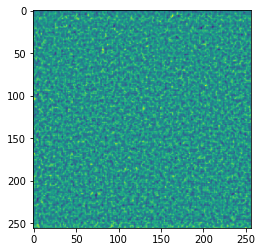

In [207]:
for im in transformed:
    plt.figure()
    plt.imshow(im)

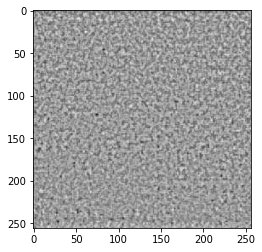

In [214]:
im = cv2.imread('/home/data/strips_socrates/101/Eurecom_101_picBG_001_0_0.PNG')
im2 = cv2.imread('/home/data/strips_socrates/101/Eurecom_101_picBG_001_0_1024.PNG')
plt.imshow(im)

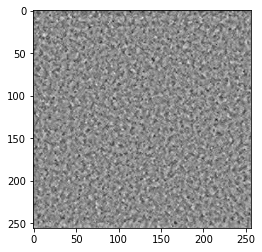

In [190]:
plt.imshow(im2)

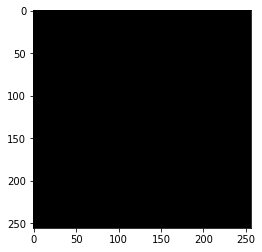

In [191]:

plt.imshow(im2-im)